In [106]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

X = [[4], [8], [12], [16], [18]]
y = [[40000], [80000], [100000], [120000], [150000]]

model = LinearRegression()
model.fit(X,y)

# predict
rooms = 12
prediction = model.predict([[rooms]])
print('Price prediction: $%.2f' % prediction)


Price prediction: $100853.66


In [107]:
r_sq = model.score(X,y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9705757231990925


In [108]:
print(f"intercept: {model.intercept_}")

intercept: [15243.90243902]


In [109]:
print(f"slope: {model.coef_}")

slope: [[7134.14634146]]


In [110]:
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 43780.48780488]
 [ 72317.07317073]
 [100853.65853659]
 [129390.24390244]
 [143658.53658537]]


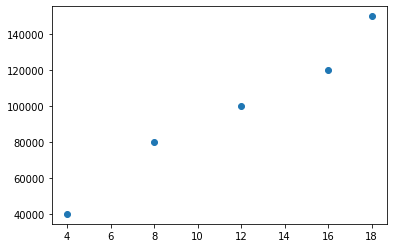

In [111]:
X = [[4], [8], [12], [16], [18]]
y = [[40000], [80000], [100000], [120000], [150000]]

plt.scatter(X, y)
plt.show()

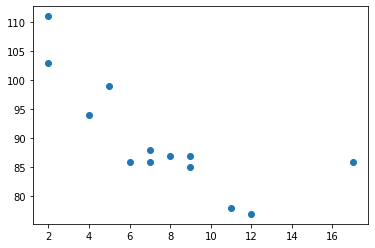

In [112]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

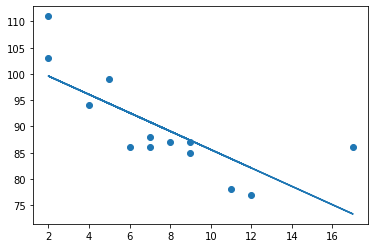

In [113]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [114]:
r

-0.758591524376155

In [115]:
p

0.0026468739224561064

In [116]:
std_err

0.453536157607742

In [117]:
slope

-1.7512877115526118

In [118]:
intercept

103.10596026490066

In [119]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

-0.758591524376155


In [120]:
import pandas  as pd 
df = pd.read_csv('insurance.csv')

In [121]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [122]:
categoricalColumns = df.select_dtypes(include=[np.object]).columns

print("Categorical columns : " )
print(categoricalColumns)

Categorical columns : 
Index(['sex', 'smoker', 'region'], dtype='object')


In [123]:
# import seaborn as sns 

In [124]:
# correlation plot
# corr = df.corr()
# sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [125]:
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
df_encode

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [126]:
import numpy as np #Data manipulation
df_encode['charges'] = np.log(df_encode['charges'])
df_encode['charges']

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1338, dtype: float64

In [127]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [128]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [129]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [130]:
lin_reg.coef_

array([ 0.03313425,  0.01351684, -0.06776735,  0.14945669,  0.27291869,
        0.24409489,  0.52333863,  0.46603008,  1.55048077, -0.05584487,
       -0.14657831, -0.13350812])

In [131]:
lin_reg.intercept_

7.0591714684176665

In [132]:
X_test

,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
918,61,28.200,0,0,0,0,0,0,0,0,0,1
755,31,27.645,1,0,1,0,0,0,0,0,0,0
207,35,27.740,1,0,1,0,0,0,1,0,0,0
520,50,27.360,0,0,0,0,0,0,0,0,0,0
695,26,40.185,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1302,25,20.800,0,1,0,0,0,0,0,0,0,1
1191,41,21.755,0,1,0,0,0,0,0,0,0,0
1085,39,18.300,0,0,0,0,0,1,1,0,0,1
663,18,33.660,1,0,0,0,0,0,0,0,1,0


In [133]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.1872962232298189
R square obtain for scikit learn library is : 0.7795687545055319


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

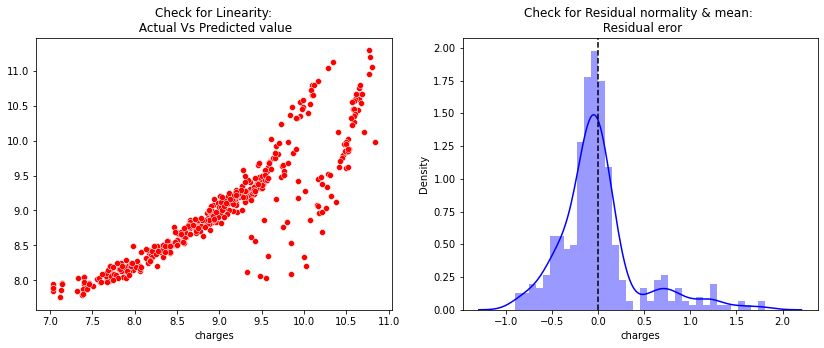

In [134]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')